# Importante:

#### Noto que nas simulacións de 10k e 100k eventos os fotóns son iguais, polo menos os 6 primeiros

# Cherenkov Radiation

If we are working with water, $n \approx 1.33 \rightarrow \frac{c}{n} \approx 2.2 \cdot 10^{8} \hspace{1mm} m/s \rightarrow E = 0.26 \hspace{1mm} MeV$.

Known this, we know that, in order to produce photons when a gamma runs through the detector, gammas must have an energy above $0.26 \hspace{1mm} MeV$. 

Released photons energy does not depend on gammas energy, but what it does depend is the number of photons because gammas have a longer track on the water, hence producing more Cherenkov light.

See: https://www.sciencedirect.com/topics/chemistry/cherenkov-radiation


In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sct

from matplotlib.patches import Ellipse

In [2]:
initial_read = False
h5file = '/home/dcostas/software/wcte/build/simulation_data/hits_NuPRISMBeamTest_mPMT_0-10MeV_100k.h5'

if(initial_read):
    
    # Read files containing the PMT coordinates and the simulated hits into Pandas dataframes.
    print("Reading files into dataframes...")
    df_pmt     = pd.read_csv('/home/jrenner/local/hk/WCSim/WCSim_build/NuPRISMBeamTest_mPMT_geom.dat', delimiter = " ")
    df_photons = pd.read_csv('/home/jrenner/local/hk/WCSim/WCSim_build/hits_NuPRISMBeamTest_mPMT.dat', delimiter = " ")

    # Output the dataframes to HDF5.
    print("Outputting files to HDF5...")
    df_pmt.to_hdf(h5file,key='pmts',complevel=9,complib='zlib')
    df_photons.to_hdf(h5file,key='photons',complevel=9,complib='zlib')

else:
    
    # Read the dataframes from HDF5.
    print("Reading the dataframes from HDF5...")
    df_pmt = pd.read_hdf(h5file, key='pmts')
    df_photons = pd.read_hdf(h5file, key='photons')

Reading the dataframes from HDF5...


In [3]:
df_pmt.head()

,pmt,loc,x,z,y,dx,dz,dy
0,1,1,178.974,39.4947,31.5579,-0.796726,-5.877850e-01,-0.140484
1,2,1,177.575,41.6524,39.4882,-0.847760,-5.090370e-01,0.148943
2,3,1,176.552,47.5473,45.2936,-0.885120,-2.938930e-01,0.360819
3,4,1,176.177,55.6000,47.4185,-0.898794,-5.868700e-17,0.438371
4,5,1,176.552,63.6527,45.2936,-0.885120,2.938930e-01,0.360819


In [4]:
df_photons.head(6)

,evt,ntriggers,energy,pmt1,pmt2,pmt3,pmt4,pmt5,pmt6,pmt7,...,pmt2500,pmt2501,pmt2502,pmt2503,pmt2504,pmt2505,pmt2506,pmt2507,pmt2508,Unnamed: 2511
0,0,1,3.663870,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,1,1.989560,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
2,2,1,9.121710,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,NaN
3,3,1,7.922130,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,4,1,4.327690,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,NaN
5,5,1,0.867727,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [5]:
"""
    Queremos analizar o conteo de fotóns en cada PMT. Queremos observar cántos fotóns chegan, en promedio, aos PMTs
    cando as gammas que os producen teñen unha enerxía determinada.
    
    En cada evento prodúcese un número aleatorio(?) de fotóns Cerenkov, e cada un deles é recollido por un PMT.
    O número de fotóns recollidos polos PMTs é o número de fotóns producido? Ou poden escapar sen ser detectados?

"""

def pmt_count(event):
    photons_count = 0
    gamma_energy = df_photons.loc[event].energy
    
    for (col, i) in zip(df_photons.columns[3:], df_photons.loc[event][3:]):
        if i == 1.:
            photons_count += 1
            print("{} rexistrou un fotón.".format(col))
            
    print("Os PMTs detectaron {} fotóns no evento {}. \n" 
          "Evento producido por unha gamma de enerxía {}".format(photons_count, event, gamma_energy))    

In [18]:
pmt_count(1)

pmt6 rexistrou un fotón.
pmt147 rexistrou un fotón.
pmt413 rexistrou un fotón.
pmt611 rexistrou un fotón.
pmt623 rexistrou un fotón.
pmt859 rexistrou un fotón.
pmt937 rexistrou un fotón.
pmt1097 rexistrou un fotón.
pmt1318 rexistrou un fotón.
pmt1319 rexistrou un fotón.
pmt1924 rexistrou un fotón.
pmt2081 rexistrou un fotón.
pmt2354 rexistrou un fotón.
pmt2454 rexistrou un fotón.
Os PMTs detectaron 14 fotóns no evento 1. 
Evento producido por unha gamma de enerxía 1.98956


In [54]:
"""
    Fagamos agora o promedio de fotóns detectados por PMT. Farei unha media aritmética e como erro engadirei o
    erro cuadrático medio. e = s/√n.

"""


meanss = [df_photons[i].mean() for i in df_photons.columns[3:-1]]
standard_errorss = [df_photons[i].sem() for i in df_photons.columns[3:-1]]

In [47]:
"""
    Temos agora unha función parecida á anterior, ca diferencia de que agora ordena por enerxías. 
    Devolve o promedio de fotóns por PMT en función da enerxía das gammas que os producen.

"""

def photon_count_per_gamma_energy(emin, emax):
    seen_photons = []
    
    for eventt, j in enumerate(df_photons.energy):
        if emin < j <= emax:
            photons_count = 0
            for (col, i) in zip(df_photons.columns[3:], df_photons.loc[eventt][3:]):
                if i == 1:
                    photons_count += 1
                    #print("{} rexistrou un fotón.".format(col))

            seen_photons.append(photons_count)

            #print("Os PMTs detectaron {} fotóns no evento {}. \n"
            #      "Evento producido por unha gamma de enerxía {} \n".format(photons_count, eventt, j))

    return [seen_photons, np.mean(seen_photons), sct.sem(seen_photons)]

In [48]:
energy_bins = np.linspace(0.5, 10, 50)
means = []
standard_errors = []
photons = []

for emin in energy_bins:
    photons.append(photon_count_per_gamma_energy(emin, emin+0.5)[0])
    means.append(photon_count_per_gamma_energy(emin, emin+0.5)[1])
    standard_errors.append(photon_count_per_gamma_energy(emin, emin+0.5)[2])

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


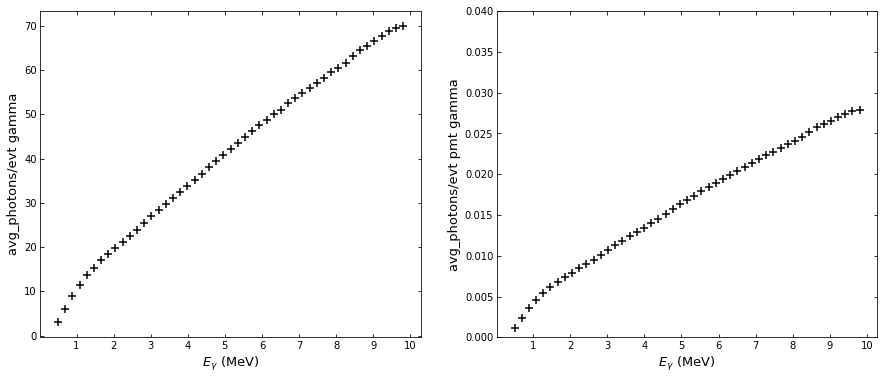

In [49]:
means2 = [i/2508 for i in means]

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
ax1.scatter(energy_bins, means, marker="+", c="k", s=50);
ax1.set_xlabel("$E_\gamma$ (MeV)", size=13);
ax1.set_ylabel("avg_photons/evt gamma", size=13);
ax1.set_xticks(np.linspace(1,10,10));
ax1.tick_params(right="True", top="True", direction="in")

ax2 = fig.add_subplot(122)
ax2.scatter(energy_bins, means2, marker="+", c="k", s=50);
ax2.set_xlabel("$E_\gamma$ (MeV)", size=13);
ax2.set_ylabel("avg_photons/evt pmt gamma", size=13);
ax2.set_xticks(np.linspace(1,10,10));
ax2.set_ylim(0, 0.04)
ax2.tick_params(right="True", top="True", direction="in")

__It can be seen in aboves plot the increasing tendency we talked about in the beggining. As gamma energy increases, so does the average number of photons per event.__

However, this is not describing the real behaviour of the detector, hence there are PMTs with privileged spatial
disposition that capture more photons that others with a less privileged spot.

What does a spot in the detector great or awfull in order to see the Cherenkov light? Below we're trying to answer this question as it is quite important for the energetic calibration of our detector.

In [6]:
dic = {}
energy_bins_width = 0.2
energy_bins = np.arange(0, 10, energy_bins_width) #Still, gammas with less than 0.26 MeV make non sense as they
                                                  #won't produce any Cherenkov light in water.

for emin in energy_bins:
    
    dic.setdefault("emin", [])
    dic.setdefault("emax", [])
    dic.setdefault("nevents", [])
    
    dic["emin"].append(emin)
    dic["emax"].append(emin + energy_bins_width)
    
    df = df_photons[(df_photons.energy > emin) & (df_photons.energy <= emin + energy_bins_width)]
    
    dic["nevents"].append(len(df))
    
    for i in range(2507):
        
        dic.setdefault("pmt{}".format(i+1), [])
        
        if len(df) > 0:
            dic["pmt{}".format(i+1)].append(df["pmt{}".format(i+1)].mean())
        else:
            dic["pmt{}".format(i+1)].append(0)

dff = pd.DataFrame.from_dict(dic)

In [7]:
dff

,emax,emin,nevents,pmt1,pmt10,pmt100,pmt1000,pmt1001,pmt1002,pmt1003,...,pmt990,pmt991,pmt992,pmt993,pmt994,pmt995,pmt996,pmt997,pmt998,pmt999
0,0.2,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.4,0.2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.6,0.4,1142,0.000000,0.000000,0.000876,0.000000,0.000000,0.000876,0.000000,...,0.000876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.8,0.6,2073,0.001447,0.000482,0.000965,0.000965,0.001447,0.000000,0.001447,...,0.000965,0.000482,0.000000,0.001930,0.000965,0.002412,0.001930,0.000482,0.000965,0.000965
4,1.0,0.8,2076,0.001445,0.001445,0.002890,0.002408,0.001445,0.001927,0.001445,...,0.001445,0.002890,0.002890,0.002890,0.000963,0.000963,0.001927,0.000482,0.003372,0.001927
5,1.2,1.0,2167,0.004615,0.004153,0.003230,0.001384,0.001846,0.004153,0.004153,...,0.001846,0.001384,0.005538,0.004615,0.003230,0.003230,0.002769,0.002769,0.003692,0.002769
6,1.4,1.2,2073,0.006753,0.004342,0.004824,0.004824,0.007718,0.007718,0.005789,...,0.004342,0.003859,0.005306,0.001447,0.005789,0.005306,0.006271,0.003859,0.004824,0.001930
7,1.6,1.4,2079,0.006253,0.005291,0.005772,0.004329,0.001924,0.005772,0.005772,...,0.006253,0.005772,0.002405,0.007215,0.006253,0.005291,0.003367,0.005291,0.005291,0.004810
8,1.8,1.6,2180,0.006422,0.007798,0.007339,0.006422,0.006422,0.006422,0.006881,...,0.005963,0.005046,0.006881,0.005046,0.005963,0.005505,0.004587,0.006881,0.005505,0.005505
9,2.0,1.8,2119,0.009438,0.008966,0.006607,0.005191,0.006607,0.004719,0.007551,...,0.006135,0.007079,0.005663,0.005191,0.006135,0.011798,0.004719,0.007079,0.006135,0.003775


The guideline for the representation is simple. We want to plot the information about the one PMT that, in average for the hole energy spectrum, records most photons. We also want to plot the same for the one that records less photons.

Furthermore, we want to locate in the detector structure where these PMTs are, hence this may clarify the privileged-spot issue we talk about early on.


In [8]:
pmt_sums = dff.loc[:, dff.columns[3:]].sum() # We sum all the values in the pmts columns
df_max = pmt_sums.idxmax() # Find the index of the one with the biggest sum
df_min = pmt_sums.idxmin() # Find the index of the one with the smallest sum

pmt_max = dff[df_max].values # Use the index to get its values
# serr_max = sct.sem(pmt_max) ----------------------------------------------------------------------|
serr_max = np.sqrt(pmt_max/dff['nevents'].values) # Standard error of the mean with scipy.stats.sem() |
#                                                                                                   V
# It is important to point why this method is invalid. We are plotting 50 points, each of them is the mean of N 
# values where N = nevents. We have to compute the error for every one of this set of points in the energy bins.
# Here we don't have the standard deviations for every energy bin, which is the estimate needed for the standard 
# error. But we are assuming Poisson distribution, where the square root of the mean is the standard devition.

pmt_min = dff[df_min].values
serr_min = np.sqrt(pmt_min/dff['nevents'].values)

/volumedisk0/home/dcostas/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys
/volumedisk0/home/dcostas/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


/home/dcostas/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


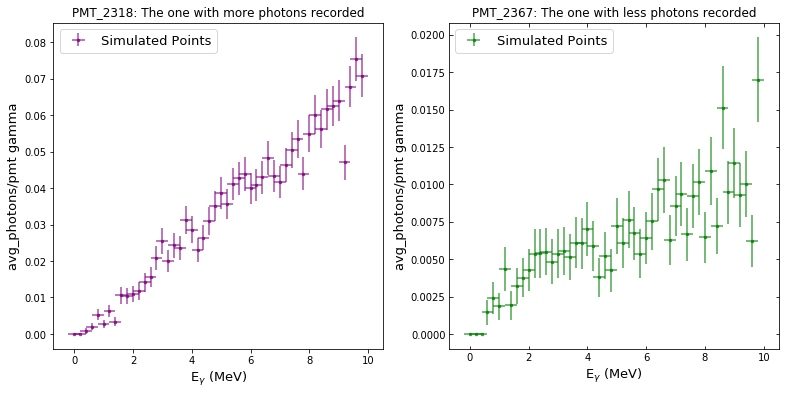

In [9]:
fig = plt.figure(figsize=(13, 6))

ax1 = fig.add_subplot(121)
ax1.errorbar(energy_bins, 
             pmt_max,
             xerr=np.ones(len(energy_bins)) * energy_bins_width/1, # Error is simply the width of the bins
             yerr=serr_max,
             ls=" ",
             marker='.', markersize=5, c="purple", alpha=0.7, label="Simulated Points")

ax1.set_xlabel("E$_{\gamma}$ (MeV)", fontsize=13);
ax1.set_ylabel("avg_photons/pmt gamma", fontsize=13);
ax1.set_title("PMT_2318: The one with more photons recorded");
#ax1.tickparams(right=True, top=True, direction="in")
plt.legend(loc="upper left", fontsize=13);

ax2 = fig.add_subplot(122)
ax2.errorbar(energy_bins, 
             pmt_min,
             xerr=np.ones(len(energy_bins)) * energy_bins_width/1, # Erro é simplemente a anchura dos bins
             yerr=serr_min,
             ls=" ",
             marker='.', markersize=5, c="green", alpha=0.7, label="Simulated Points")

ax2.set_xlabel("E$_{\gamma}$ (MeV)", fontsize=13);
ax2.set_ylabel("avg_photons/pmt gamma", fontsize=13);
ax2.set_title("PMT_2367: The one with less photons recorded");
ax2.tick_params(right="True", top="True", direction="in")
plt.legend(loc="upper left", fontsize=13);

#plt.savefig("Figuras/100k_rate.png")

In [10]:
max_pmts = {}
min_pmts = {}

for index, val in pmt_sums.iteritems():
    if val in sorted(pmt_sums)[-5:]:
        max_pmts.setdefault(index, val)
    
    elif val in sorted(pmt_sums)[:5]:
        min_pmts.setdefault(index, val)

In [11]:
import operator
sorted_max_pmts = sorted(max_pmts.items(), key=operator.itemgetter(1))
sorted_min_pmts = sorted(min_pmts.items(), key=operator.itemgetter(1))

# PMTs that record the most and the least amout of photons

### Maximum PMTs

|  PMTs    | avg_photons | x     | y     | z      | dx   | dy    | dz    |
| -------- | ----------- | ----- | ----- | ------ | ---- | ----- | ----- |
| pmt_2318 | 1.6562      | 0     | 0     | 160.7  | 0    | 0     | -1    |
| pmt_1577 | 1.6428      | -1.01 | 9.84  | -160.7 | 0    | 0     | 1     |
| pmt_1574 | 1.4764      | 8.5   | 0     | -162.0 | 0.31 | 0     | 0.95  |
| pmt_1479 | 1.4750      | -49.5 | 0     | -162.0 | 0.31 | 0     | 0.95  |
| pmt_2336 | 1.4687      | 42.5  | 50.7  | 162.0  | 0.15 | -0.27 | -0.95 |

As it can be seen in the plot below (the one that sows all PMTs coloured according to the avg_photons it has recorded) that those PMTs are the ones in the center of the upper and lower lids. 

**Weird, those PMTs are not in the actual top(bottom) hence top is 1

Hence, it is more interesting to study which are the ones that record the least amout of photons (we've theorized about the posibility of been the ones that catch not real photons but reflected ones).

### Minimum PMTs
 
| PMTs     | avg_photons | x      | y      | z      | dx    | dy    | dz    |
| -------- | ----------- | ------ | ------ | ------ | ----- | ----- | ----- |
| pmt_2367 | 0.3192      | 66.1   | -129.9 | 165.9  | 0.29  | -0.51 | -0.81 |
| pmt_1380 | 0.3263      | -129.9 | -66.1  | -165.9 | -0.51 | -0.29 | 0.81  |
| pmt_2117 | 0.3265      | -129.9 | -66.1  | 165.9  | -0.51 | 0.29  | -0.81 |
| pmt_2462 | 0.3266      | 129.9  | -66.1  | 165.9  | 0.51  | 0.29  | -0.81 |
| pmt_1754 | 0.3326      | 129.9  | 66.1   | -165.9 | 0.51  | 0.29  | 0.81  |
 
 They are all of them in the lids too, upper or lower. 
 
 **Weird? The max PMTs and the min PMTs are both in the lids**

# Gamma Spectrum

We will now take a look to the gamma energy spectrum for our 7 cm source, so we will have a histogram of gammas/decay (event). In every event we see (every Cf decay) gammas that have a wide energy spectrum.

In [12]:
def read_hdf5_to_df(fname):
    """
    Reads an output HDF5 file from the nisource Geant4 simulation into a Pandas DataFrame.
    """
    
    # Open the file and get the ntuple.
    fn = h5py.File(fname,'r')
    ntuple = fn['default_ntuples']['nisource']
    
    # Fill a dictionary with the ntuple column values.
    df_values = {}
    for col in list(ntuple):

        # Only process H5 groups with actual data.
        if(isinstance(ntuple[col],h5py._hl.group.Group)):
            #print("Adding column",col,"...")
            if(ntuple[col]['pages'].dtype == object):
                df_values[col] = [x.decode('utf-8') for x in ntuple[col]['pages'][:]]
            else:
                df_values[col] = ntuple[col]['pages'][:]
             
    # Create the dataframe.
    df = pd.DataFrame.from_dict(df_values)
    
    # Add composite columns.
    ri = (df.xi**2 + df.yi**2 + df.zi**2)**0.5
    rf = (df.xf**2 + df.yf**2 + df.zf**2)**0.5
    Ki = (df.pxi**2 + df.pyi**2 + df.pzi**2)**0.5
    Kf = (df.pxf**2 + df.pyf**2 + df.pzf**2)**0.5
    
    df['ri'] = ri  # initial radius
    df['rf'] = rf  # final radius
    df['Ki'] = Ki  # initial kinetic energy
    df['Kf'] = Kf  # final kinetic energy
    
    # Compute time since initial decay.
    timin_evts = pd.DataFrame(df[df.ti > 0].groupby(['event'])['ti'].min())
    timin_evts = timin_evts.rename(columns={"ti": "ti_min"})
    df = pd.merge(df, timin_evts, on='event', how='outer')
    
    return df

In [13]:
df7_200k = read_hdf5_to_df("/home/dcostas/hkscripts/nicf_source/notebooks/7_cm-200k.hdf5")

In [14]:
df7_200k[df7_200k.particleName == "gamma"].head()

,event,mass,parentID,particleName,pxf,pxi,pyf,pyi,pzf,pzi,...,xi,yf,yi,zf,zi,ri,rf,Ki,Kf,ti_min
14,0,0.0,11,gamma,0.0,0.015939,0.0,0.002531,-0.0,-0.008824,...,5.104964e-07,0.002226,3.090594e-07,-0.007762,-1.440168e-06,0.000002,0.016178,0.018393,0.0,2.626511e+17
16,0,0.0,20,gamma,-0.0,-0.006793,-0.0,-0.000804,0.0,0.004562,...,1.401870e-02,0.001500,2.226266e-03,-0.003638,-7.762003e-03,0.016178,0.008806,0.008222,0.0,2.626511e+17
38,0,0.0,34,gamma,0.0,0.010926,0.0,0.003204,-0.0,-0.005533,...,2.885419e-06,0.038450,2.380522e-06,-0.066392,-8.354822e-07,0.000004,0.151900,0.012659,0.0,2.626511e+17
68,0,0.0,66,gamma,0.0,0.005156,-0.0,0.322251,-0.0,0.332424,...,2.889380e-06,-1.793454,2.364694e-06,24.263444,-8.461135e-07,0.000004,24.897469,0.463009,0.0,2.626511e+17
77,0,0.0,69,gamma,0.0,0.885257,0.0,0.111210,-0.0,-0.185078,...,2.889380e-06,-21.722618,2.364694e-06,32.557153,-8.461135e-07,0.000004,43.459150,0.911209,0.0,2.626511e+17


In [15]:
df7_200k_gammas_world = df7_200k[(df7_200k.particleName == "gamma") & (df7_200k.volFinal == "World")]

In [16]:
years = (365*24*60*60*1.0e9) 
df7_200k_gammas_world_timecut = df7_200k_gammas_world[(df7_200k_gammas_world.ti < 10*years)]

In [17]:
df7_200k_cut = df7_200k_gammas_world_timecut

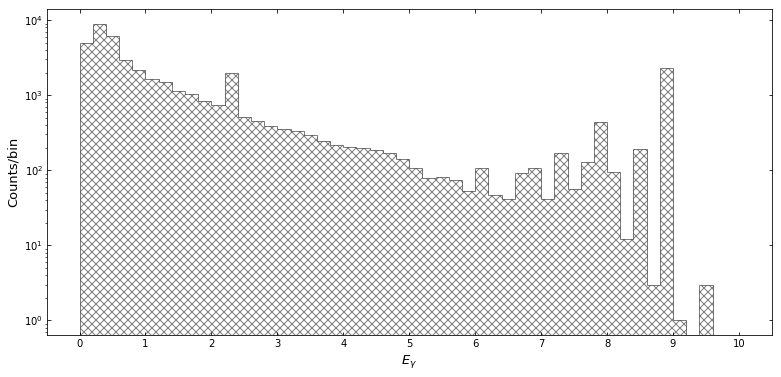

In [20]:
fig = plt.figure(figsize=(13,6))

gammas, bins, _ = plt.hist(df7_200k_cut.Kf, bins=50, range=[0,10],
         hatch='xxx', alpha=0.5, histtype="step", color="k");

plt.xlabel("$E_{\gamma}$", fontsize=13);
plt.ylabel("Counts/bin", fontsize=13);
plt.xticks(np.arange(0, 11, 1));
plt.tick_params(right=True, top=True, direction="in");
plt.yscale("log");

# bins=int(np.sqrt(len(df7_200k_cut.Kf)))

We have a consistent amount of $9 \hspace{1mm} MeV$ gammas.

# Photons Rate

The second plot in the notebook show the *avg_photons/gamma PMT*. Here, the third plot, show the gamma energy spectrum for every decay that has been simulated, so it shows *gammas/decay*. This means that if both plots are multiplied *avg_photons/decay* is obtained, which is an interesting plot in order to calibrate the PMTs.

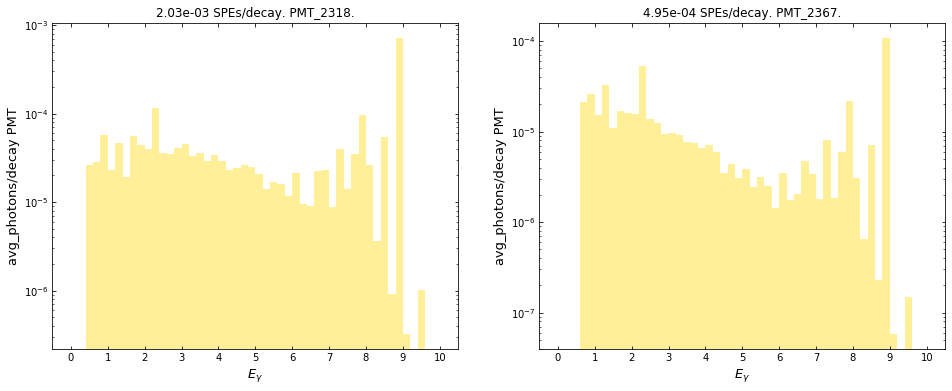

In [23]:
Nevents = len(np.unique(df7_200k["event"].values))

max_photons_per_decay = (gammas * pmt_max)/Nevents
min_photons_per_decay = (gammas * pmt_min)/Nevents

hbin_centers = (bins[:-1] + bins[1:])/2

fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
ax1.bar(hbin_centers, max_photons_per_decay, 
        align='center', width=0.2, color="gold", alpha=0.4);

ax1.set_yscale("log");
ax1.set_xlabel("$E_{\gamma}$", fontsize=13);
ax1.set_ylabel("avg_photons/decay PMT", fontsize=13);
ax1.tick_params(right=True, top=True, which="both", direction="in")
ax1.set_xticks(np.arange(0, 11, 1));
ax1.set_title("{:.2e} SPEs/decay. PMT_2318.".format(np.sum(max_photons_per_decay)));


ax2 = fig.add_subplot(122)
ax2.bar(hbin_centers, min_photons_per_decay, 
        align='center', width=0.2, color="gold", alpha=0.4);

ax2.set_yscale("log");
ax2.set_xlabel("$E_{\gamma}$", fontsize=13);
ax2.set_ylabel("avg_photons/decay PMT", fontsize=13);
ax2.tick_params(right=True, top=True, which="both", direction="in")
ax2.set_xticks(np.arange(0, 11, 1));
ax2.set_title("{:.2e} SPEs/decay. PMT_2367.".format(np.sum(min_photons_per_decay)));

plt.savefig("rate.png")

Here we are talking (all the time actually) about Single PhotoElectrons (SPE), photons that actually produce an electron when they arrive at the PMT, hence, actual recorded photons. 

When we say SPEs/decay we are assuming an homogeneous distribution of the SPEs in the PMTs. But we know this is not true. The plot above is made taking into account the PMT that records the largest amount of photons, we can also do this for the one that records the least.

Now, asumming that $^{252}Cf$ activity is $\approx 3.4 \cdot 10^4$ $decays/(s-\mu Ci)$, we can obtain:

\begin{equation}
[1.56 - 6.58] \cdot 10^{-2} \hspace{1mm} photons/decay \times 3.4 \cdot 10^4 \hspace{1mm} decays/(s-\mu Ci) = [530 - 2237] \hspace{1mm} photons/s 
\end{equation}

A result that seems not very appropiate and that defenetly does not mach with Joshs.